In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [34]:
full_df = pd.read_csv("creditcard.csv")
full_df.drop(columns='Time', inplace=True)

In [35]:
fraud_df = full_df.loc[full_df['Class'] == 1]
fraud_df = fraud_df.reset_index(drop=True)

In [36]:
not_fraud_df = full_df.loc[full_df['Class']==0]
not_fraud_df = not_fraud_df.sample(n=492, random_state=1)
not_fraud_df = not_fraud_df.reset_index(drop=True)

In [37]:
new_df = fraud_df.append(not_fraud_df, ignore_index=True)

In [38]:
X = np.array(new_df.iloc[:, 0:29])
y = np.array(new_df['Class'])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

In [40]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [41]:
X_scaler.mean_

array([-2.34408351e+00,  1.72593393e+00, -3.50385541e+00,  2.29267577e+00,
       -1.54495917e+00, -6.50459379e-01, -2.78214890e+00,  1.19691930e-01,
       -1.30969009e+00, -2.83966132e+00,  1.91962177e+00, -3.14408932e+00,
       -1.10163300e-01, -3.49359711e+00, -8.06684127e-02, -2.10348740e+00,
       -3.30592438e+00, -1.11337771e+00,  3.25509126e-01,  2.50819217e-01,
        3.78225637e-01,  1.51904313e-02,  6.24401137e-03, -7.19934149e-02,
       -4.12114447e-03,  3.59386194e-02,  1.10556182e-01,  5.51107653e-02,
        1.20457141e+02])

In [42]:
X_scaler.scale_

array([  5.45764703,   3.76645048,   6.18928462,   3.21728003,
         4.08145619,   1.75706299,   5.99535122,   5.17581596,
         2.28457207,   4.59228069,   2.82188534,   4.5992702 ,
         1.06289144,   4.70213844,   0.99883533,   3.4612777 ,
         5.85696658,   2.37151553,   1.29637271,   1.14153015,
         3.10464695,   1.25964297,   1.15804066,   0.56729736,
         0.68061652,   0.48298716,   1.01428274,   0.41543883,
       281.93751809])

In [43]:
# Transform the training and testing data using the X_scaler model

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.935
k: 3, Train/Test Score: 0.946/0.951
k: 5, Train/Test Score: 0.936/0.935
k: 7, Train/Test Score: 0.927/0.935
k: 9, Train/Test Score: 0.920/0.939
k: 11, Train/Test Score: 0.921/0.939
k: 13, Train/Test Score: 0.917/0.943
k: 15, Train/Test Score: 0.917/0.939
k: 17, Train/Test Score: 0.916/0.935
k: 19, Train/Test Score: 0.916/0.935


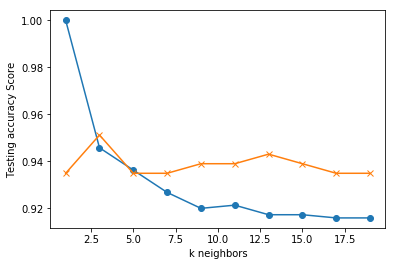

In [44]:
train_scores = []
test_scores = []
for k in range(1, 21, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 21, 2), train_scores, marker='o')
plt.plot(range(1, 21, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()